# Sustainable Income Planning

## Simple Income Calculation (too simple)

A Trader has created a levered trading strategy that (on average) generates an __annualized mean return of 105%__ (log) with a __standard deviation of 67%__. <br>
The applicable (flat) __tax rate is 25%__ and the __inflation__ protection shall be __3% p.a.__<br>
Calculate the Trader´s __sustainable income__ if the trader starts with __USD 10,000__ (available funds for trading).

In [1]:
import numpy as np

In [2]:
ann_mean = 1.05
ann_std = 0.67

In [3]:
cagr = np.exp(ann_mean) - 1
cagr

1.8576511180631639

In [4]:
I0 = 10000
tax_rate = 0.25
infl = 0.03

In [5]:
ann_income = I0 * (cagr * (1-tax_rate) - infl)
ann_income

13632.38338547373

In [6]:
monthly_income = ann_income / 12
monthly_income

1136.0319487894774

Is that realistic? __No!__ It assumes __zero risk__ and __annual year-end distributions__.

## Introduction to Simulations (Part 1)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [8]:
ann_mean = 1.05
ann_std = 0.67

In [9]:
td_per_year = 259
td_per_year

259

In [10]:
daily_mean = ann_mean / td_per_year
daily_mean

0.004054054054054054

In [11]:
daily_std = ann_std / np.sqrt(td_per_year)
daily_std

0.04163177432208041

__Returns follow a random process__. It can get better/worse than the average/expected performance (random noise). 

__One Simulation (over a 1-year period)__

In [12]:
days = 259

In [13]:
np.random.seed(123)
returns = np.random.normal(loc = daily_mean, scale = daily_std,
                           size = days) # normal distribution (simplified)

In [14]:
returns = np.insert(returns, 0, 0)

In [15]:
returns

array([ 0.00000000e+00, -4.11426742e-02,  4.55753146e-02,  1.58349510e-02,
       -5.86556675e-02, -2.00341011e-02,  7.28062873e-02, -9.69729086e-02,
       -1.38023397e-02,  5.67572267e-02, -3.20298868e-02, -2.42091810e-02,
        1.11151633e-04,  6.61432504e-02, -2.25445697e-02, -1.44297027e-02,
       -1.40287602e-02,  9.58908374e-02,  9.50938390e-02,  4.58545993e-02,
        2.01316791e-02,  3.47520162e-02,  6.61158734e-02, -3.49063704e-02,
        5.30059035e-02, -4.81472229e-02, -2.24966726e-02,  4.18184529e-02,
       -5.54244584e-02, -1.77725529e-03, -3.18223313e-02, -6.58783389e-03,
       -1.12456176e-01, -6.96980124e-02, -2.50830770e-02,  4.26659607e-02,
       -3.17470751e-03,  4.17253458e-03,  3.27059866e-02, -3.25626045e-02,
        1.58619628e-02, -2.94747831e-02, -6.78718924e-02, -1.22197979e-02,
        2.79426102e-02,  1.81501170e-02,  3.56152958e-03,  1.03652465e-01,
        2.12443199e-02,  4.48005706e-02,  9.72319324e-02, -4.98210141e-02,
       -3.91925423e-02,  

In [16]:
len(returns)

260

In [17]:
creturns = np.exp(returns.cumsum())
creturns

array([1.        , 0.9596922 , 1.00444248, 1.02047437, 0.96233941,
       0.94325164, 1.01448806, 0.92072967, 0.90810875, 0.96114124,
       0.93084379, 0.90857942, 0.90868041, 0.97081575, 0.949174  ,
       0.93557604, 0.92254271, 1.0153864 , 1.11668343, 1.16908064,
       1.1928547 , 1.23503753, 1.31945297, 1.27419023, 1.34355189,
       1.28039618, 1.25191311, 1.30537627, 1.23499493, 1.23280198,
       1.19418898, 1.18634772, 1.06016364, 0.98878858, 0.96429519,
       1.00632808, 1.00313835, 1.00733272, 1.04082322, 1.00747717,
       1.02358515, 0.99385549, 0.92863885, 0.91736013, 0.94335506,
       0.96063339, 0.96406081, 1.06935061, 1.09231127, 1.14236018,
       1.25901338, 1.19782495, 1.15178721, 1.2435407 , 1.20778971,
       1.21419563, 1.27462676, 1.32815285, 1.43462317, 1.53299386,
       1.60929688, 1.56468133, 1.62389531, 1.65196507, 1.56957487,
       1.67173754, 1.73589698, 1.74625267, 1.73641419, 1.65862481,
       1.67925362, 1.71927971, 1.66755257, 1.75733015, 1.68568

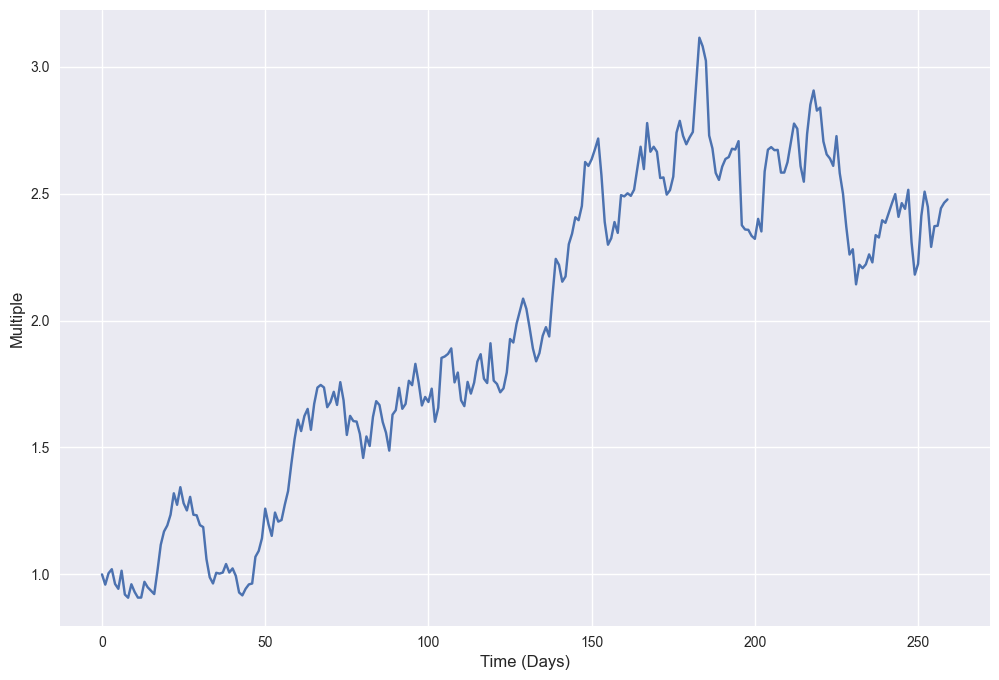

In [18]:
plt.figure(figsize = (12, 8))
plt.plot(creturns)
plt.xlabel("Time (Days)", fontsize = 12)
plt.ylabel("Multiple",  fontsize = 12)
plt.show()

In [19]:
np.mean(returns) * td_per_year

0.9035983589568952

In [20]:
np.std(returns) * np.sqrt(td_per_year)

0.6793305254863935

__How good/bad can it get? -> Many Simulations__

## Introduction to Simulations (Part 2)

__Many Simulations (each over 1-year period)__

In [21]:
sims = 1000
sims

1000

In [22]:
days

259

In [25]:
np.random.seed(123)
returns = np.random.normal(loc = daily_mean, scale = daily_std, size = days * sims).reshape(days, sims)
returns.shape

(259, 1000)

In [26]:
returns

array([[-0.04114267,  0.04557531,  0.01583495, ..., -0.03380284,
         0.02363197, -0.04221677],
       [-0.02712096,  0.02768403,  0.03395194, ..., -0.01090411,
        -0.06296041,  0.004619  ],
       [-0.06981002, -0.04596141,  0.04969317, ...,  0.08900086,
         0.04634848, -0.06396345],
       ...,
       [ 0.03950395,  0.03534108,  0.0702441 , ..., -0.03464241,
        -0.02268064, -0.06339479],
       [-0.1057529 ,  0.02532939,  0.01398934, ..., -0.01974085,
         0.04955439, -0.02298456],
       [ 0.04087776, -0.05421596, -0.02584539, ..., -0.01003307,
        -0.01759928,  0.05507618]])

In [27]:
returns = np.insert(returns, 0, 0, axis = 0)
returns

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04114267,  0.04557531,  0.01583495, ..., -0.03380284,
         0.02363197, -0.04221677],
       [-0.02712096,  0.02768403,  0.03395194, ..., -0.01090411,
        -0.06296041,  0.004619  ],
       ...,
       [ 0.03950395,  0.03534108,  0.0702441 , ..., -0.03464241,
        -0.02268064, -0.06339479],
       [-0.1057529 ,  0.02532939,  0.01398934, ..., -0.01974085,
         0.04955439, -0.02298456],
       [ 0.04087776, -0.05421596, -0.02584539, ..., -0.01003307,
        -0.01759928,  0.05507618]])

In [28]:
df = pd.DataFrame(data = returns)
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.041143,0.045575,0.015835,-0.058656,-0.020034,0.072806,-0.096973,-0.013802,0.056757,-0.032030,...,-0.014829,0.045655,-0.050818,-0.076369,-0.013416,0.030480,0.048597,-0.033803,0.023632,-0.042217
2,-0.027121,0.027684,0.033952,-0.037552,0.023825,-0.073735,-0.004383,-0.043167,-0.029572,-0.049071,...,-0.040925,0.010752,-0.021032,0.033168,0.080967,0.039262,-0.042570,-0.010904,-0.062960,0.004619
3,-0.069810,-0.045961,0.049693,0.039901,-0.059242,-0.014574,0.023350,0.020394,-0.063688,0.014879,...,0.050816,-0.033785,0.018054,0.005800,-0.038970,0.000918,-0.035338,0.089001,0.046348,-0.063963
4,-0.014705,0.029432,0.052919,0.040349,0.083351,0.009612,0.057419,-0.044205,0.040295,-0.004673,...,-0.000240,-0.069273,-0.003655,0.025040,0.060447,-0.033746,-0.071634,-0.001056,0.078762,-0.009289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.051937,-0.018990,-0.052896,0.034635,0.031233,-0.068361,0.024687,-0.070243,-0.069933,-0.050282,...,-0.050380,-0.078665,-0.020635,-0.011015,-0.024401,0.049737,0.025631,0.042642,-0.005112,0.011817
256,-0.055444,0.053043,-0.014038,0.022591,-0.065461,0.056945,-0.022807,-0.017407,0.037245,-0.040969,...,0.026566,0.032949,0.005559,0.004621,-0.028069,0.050835,0.008423,-0.002940,-0.047304,-0.026624
257,0.039504,0.035341,0.070244,0.019747,0.052718,-0.014777,-0.045915,0.055573,-0.068645,0.024780,...,-0.006354,0.079942,-0.032088,0.027214,-0.059273,-0.011992,-0.017676,-0.034642,-0.022681,-0.063395
258,-0.105753,0.025329,0.013989,0.040557,-0.011787,-0.034180,-0.089196,-0.042372,0.005505,0.002658,...,0.052763,-0.043537,0.001255,0.053566,0.007309,-0.046991,-0.007563,-0.019741,0.049554,-0.022985


In [29]:
df = df.cumsum().apply(np.exp)
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.959692,1.046630,1.015961,0.943031,0.980165,1.075522,0.907581,0.986292,1.058399,0.968478,...,0.985281,1.046713,0.950451,0.926474,0.986673,1.030950,1.049797,0.966762,1.023913,0.958662
2,0.934014,1.076010,1.051047,0.908275,1.003798,0.999072,0.903611,0.944623,1.027558,0.922100,...,0.945771,1.058028,0.930670,0.957719,1.069884,1.072232,1.006045,0.956278,0.961435,0.963100
3,0.871035,1.027674,1.104596,0.945249,0.946059,0.984617,0.924959,0.964086,0.964156,0.935923,...,0.995074,1.022879,0.947625,0.963291,1.028993,1.073216,0.971114,1.045290,1.007045,0.903426
4,0.858320,1.058370,1.164625,0.984169,1.028293,0.994127,0.979624,0.922397,1.003799,0.931559,...,0.994835,0.954420,0.944168,0.987716,1.093111,1.037604,0.903982,1.044187,1.089568,0.895073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2.514719,2.917508,2.947740,2.093768,4.564045,2.047451,3.070725,3.148474,1.555917,5.649989,...,2.307519,2.627835,1.586468,1.810617,2.720968,4.796494,1.357144,5.752280,3.964843,1.086822
256,2.379089,3.076440,2.906649,2.141608,4.274845,2.167427,3.001485,3.094142,1.614959,5.423190,...,2.369643,2.715862,1.595313,1.819004,2.645655,5.046629,1.368623,5.735393,3.781658,1.058268
257,2.474953,3.187109,3.118166,2.184319,4.506254,2.135634,2.866788,3.270960,1.507819,5.559253,...,2.354633,2.941887,1.544934,1.869185,2.493396,4.986471,1.344644,5.540107,3.696853,0.993262
258,2.226584,3.268868,3.162094,2.274729,4.453452,2.063870,2.622155,3.135257,1.516142,5.574047,...,2.482207,2.816553,1.546874,1.972040,2.511686,4.757573,1.334513,5.431814,3.884664,0.970693


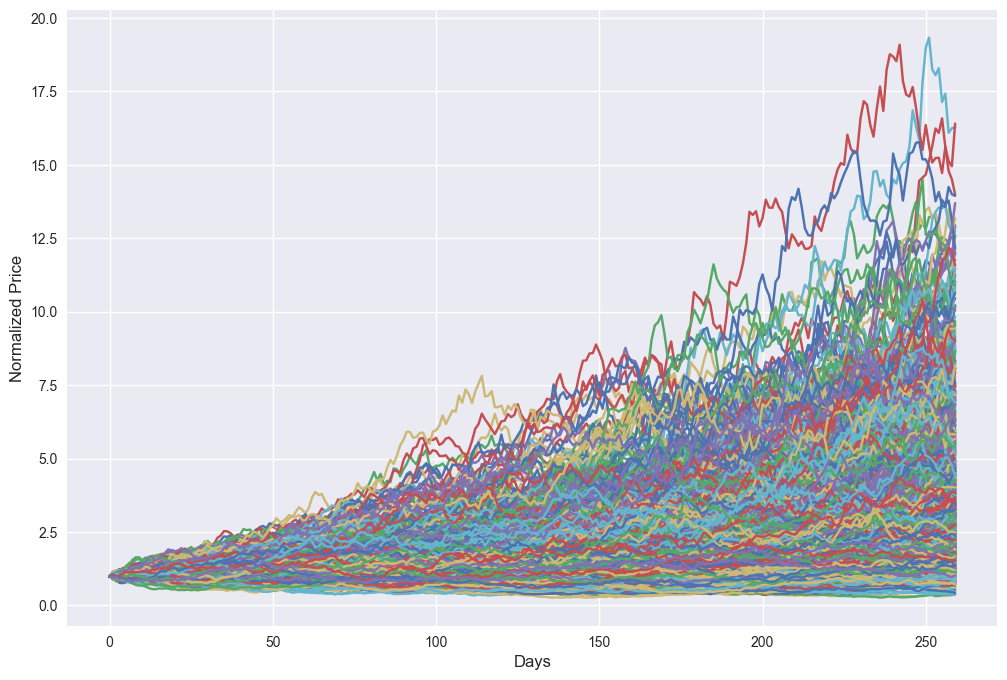

In [30]:
plt.figure(figsize = (12 ,8))
plt.plot(df.values)
plt.xlabel("Days", fontsize = 12)
plt.ylabel("Normalized Price", fontsize = 12)
plt.show()

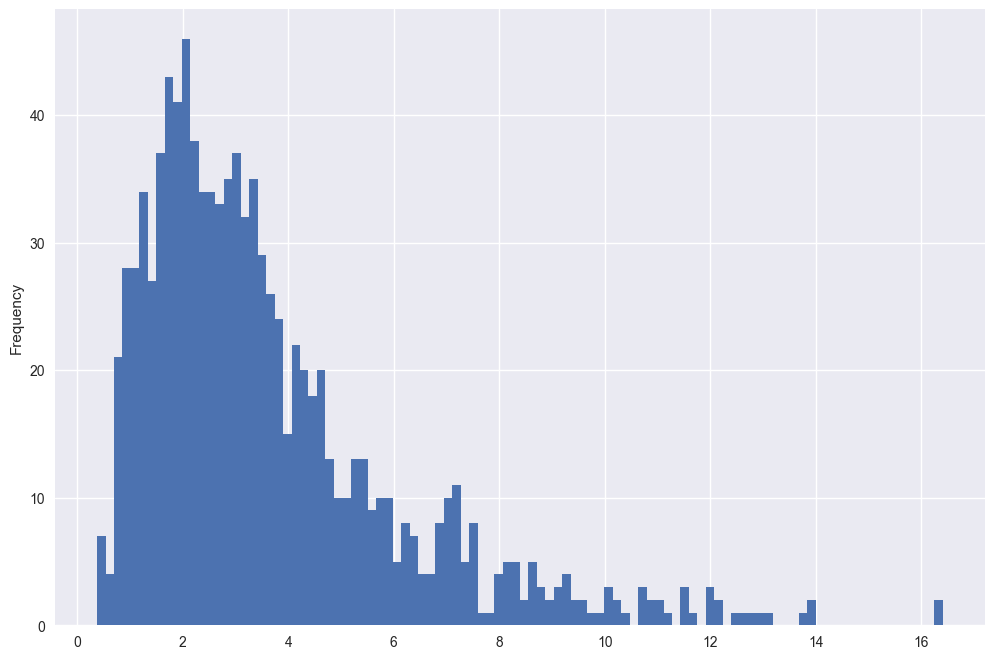

In [31]:
df.iloc[-1].plot(kind = "hist", bins = 100, figsize = (12, 8)) # final multiple after 1 year
plt.show()

In [32]:
df.iloc[-1].describe()

count    1000.000000
mean        3.629496
std         2.495625
min         0.377842
25%         1.909573
50%         2.977942
75%         4.550338
max        16.399485
Name: 259, dtype: float64

In [33]:
np.percentile(df.iloc[-1], [10, 90])

array([1.2374534 , 7.04113117])

Keep in mind: This assumes normally distributed returns -> In reality, there is (a bit) more weight in the tails.

So far, we ignored annual __Taxes__ and monthly __Income Distributions__ -> Next Step: __path-dependent Simulation__

## A path-dependent Simulation with Taxes and Income - Introduction

__Tax Payments__

Assumptions: 
- annual, year-end payments.
- Full Trading Profit in a calender year is taxable @ x% flat tax rate (no loss carryforward) <br>
__++++ This is not Tax Advice. Please consult your local tax advisor!!! ++++__

__Income Distributions__

Assumptions: 
- monthly, in arrears
- increase on a monthly basis @ inflation rate

Tax Payments and Income Distributions are limited to Trading Profits and the Trading Capital (can´t get negative). <br> (no additional/subsequent funding)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
plt.style.use("seaborn-v0_8")

pd.set_option('future.no_silent_downcasting', True)

In [35]:
class Trade_Income():
    
    def __init__(self, start, end, I0, dist, infl, tax):
        
        self.start = start
        self.end = end
        self.I0 = I0
        self.dist = dist
        self.infl = infl
        self.tax_rate = tax
        self.prepare_data()
    
    def prepare_data(self):
        
        self.index = pd.date_range(start = self.start, end = self.end, freq= "D")
        self.td_index = pd.date_range(start = self.start, end = self.end, freq= "B")
        self.days = len(self.td_index) 
        self.td_per_year = (self.days / ((self.td_index[-1] - self.td_index[0]).days / 365.25))
        self.tax_index = pd.date_range(start = self.start, end = self.end, freq= "BYE-DEC") # updated
        self.dist_index = pd.date_range(start = self.start, end = self.end, freq= "BME") # updated
        
        dist = [self.dist * (1 + self.infl)**(i/12) for i in range(len(self.dist_index))]
        dist = pd.Series(dist, index = self.dist_index)
        tax = pd.Series(True, index = self.tax_index)
        df = pd.DataFrame(data = {"Dist":dist, "Tax":tax}, index = self.index)
        df["Dist"] = df.Dist.fillna(0) # updated
        df["Tax"] = df.Tax.fillna(False) # updated
        self.raw_data = df
        
    def simulate_one(self, ann_mean, ann_std, seed = 123):
        
        daily_mean = ann_mean / self.td_per_year
        daily_std = ann_std / np.sqrt(self.td_per_year)
        
        np.random.seed(seed)
        returns = np.random.normal(loc = daily_mean, scale = daily_std, size = self.days)
        returns = pd.Series(np.exp(returns) - 1, index = self.td_index)
        data = self.raw_data.copy()
        data["returns"] = returns
        data["returns"] = data.returns.fillna(0) # updated
        self.data = data
        
        self.path_dependent()
        
    def simulate_many(self, ann_mean, ann_std, seed = 123, sims = 1000):
        
        daily_mean = ann_mean / self.td_per_year
        daily_std = ann_std / np.sqrt(self.td_per_year)
        
        np.random.seed(seed)
        matrix = np.random.normal(loc = daily_mean, scale = daily_std, size = sims * self.days).reshape(sims, self.days)
        
        results = []
        for sim in range(sims):
            returns = matrix[sim, :]
            returns = pd.Series(np.exp(returns) - 1, index = self.td_index)
            data = self.raw_data.copy()
            data["returns"] = returns
            data["returns"] = data.returns.fillna(0) # updated
            self.data = data
            self.path_dependent()
            
            results.append(round(self.data.Equity.iloc[-1], 0))
        return results
                                                                            
    def path_dependent(self):
        
        Equity = [I0]
        Year_Begin = I0
        Year_Distr = 0
        dist_list = []
        tax_list = []
        
        df = self.data.copy()

        for i in range(len(self.index)):
            equity_bd = Equity[i] * (1 + df.returns.iloc[i])
            distribution = min(df.Dist.iloc[i], equity_bd)
            dist_list.append(distribution)
    
            equity_bt = equity_bd - distribution
            Year_Distr += distribution
    
            if df.Tax.iloc[i]:
                taxable_income = max(0, Year_Distr + equity_bt - Year_Begin)
                tax_pay = self.tax_rate * taxable_income
                tax_list.append(tax_pay)
                equity_at = max(0, equity_bt - tax_pay)
                Year_Begin = equity_at
                Year_Distr = 0
    
            else:
                equity_at = equity_bt
    
            Equity.append(equity_at)
        
        df["Equity"] = Equity[1:]
        df["Dist"] = dist_list
        df["Tax"] = pd.Series(tax_list, index = self.tax_index)
        df["Tax"] = df.Tax.fillna(0)
        
        self.data = df   

In [36]:
start = "2020-01-01"
end = "2029-12-31" # 10 years
I0 = 10000 # initial trading capital
dist = 545.7 # (initial) monthly distribution
infl = 0.03 # inflation rate
tax = 0.25 # flat tax rate

In [37]:
TI = Trade_Income(start, end, I0, dist, infl, tax)
TI

__One Simulation__

In [38]:
ann_mean = 1.05
ann_std = 0.67 

In [39]:
TI.simulate_one(ann_mean, ann_std, seed = 123)

In [40]:
TI.data

,Dist,Tax,returns,Equity
2020-01-01,0.000,0.000,-0.040,"9,598.245"
2020-01-02,0.000,0.000,0.046,"10,043.958"
2020-01-03,0.000,0.000,0.016,"10,203.516"
2020-01-04,0.000,0.000,0.000,"10,203.516"
2020-01-05,0.000,0.000,0.000,"10,203.516"
...,...,...,...,...
2029-12-27,0.000,0.000,0.004,"35,782.161"
2029-12-28,0.000,0.000,-0.038,"34,414.506"
2029-12-29,0.000,0.000,0.000,"34,414.506"
2029-12-30,0.000,0.000,0.000,"34,414.506"


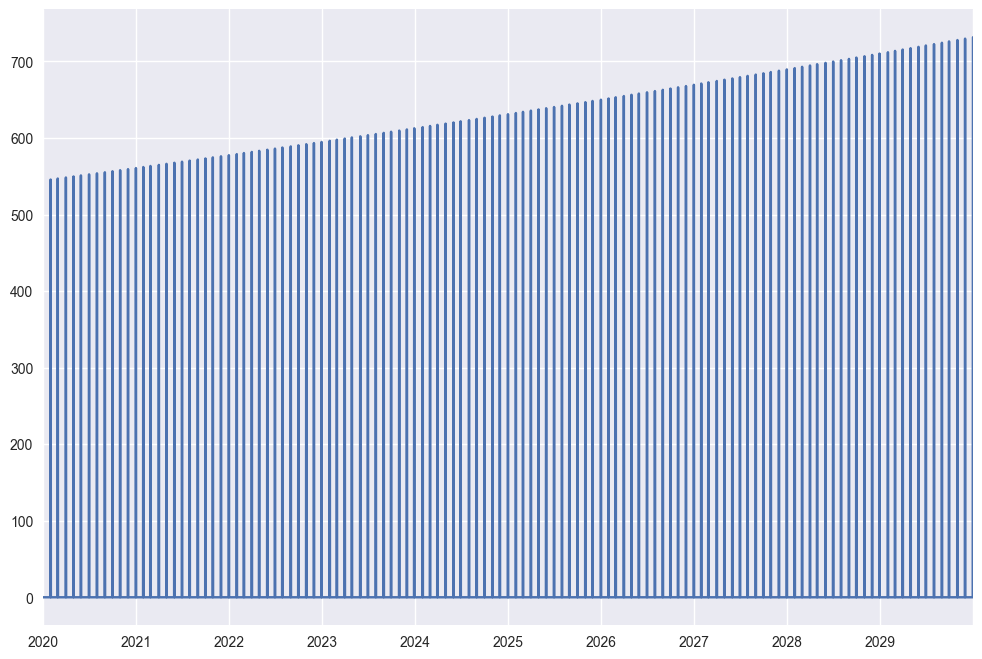

In [41]:
TI.data.Dist.plot(figsize = (12, 8)) # income distributions
plt.show()

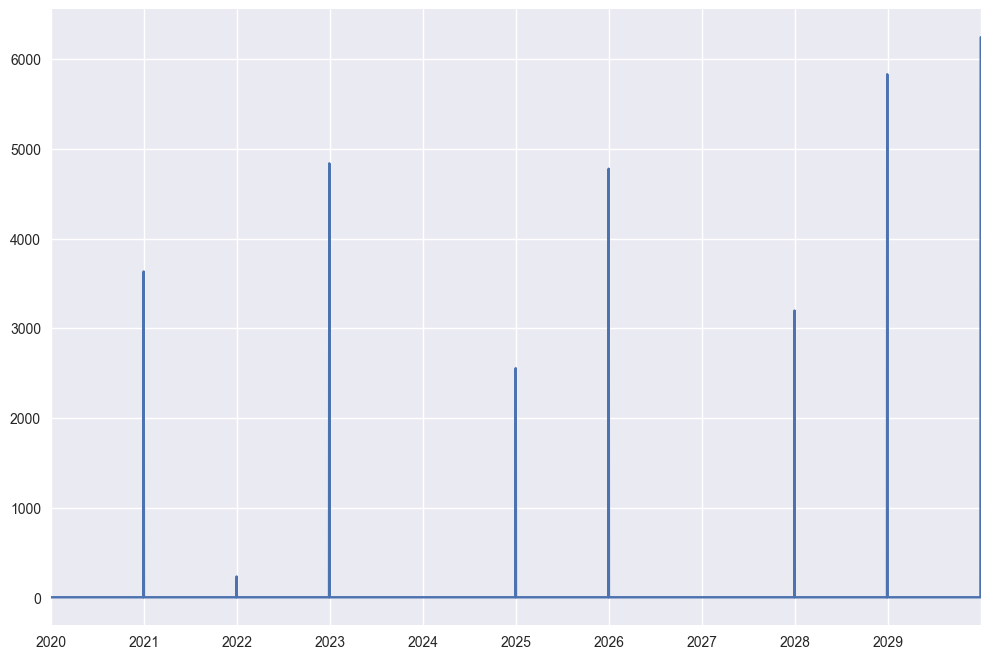

In [42]:
TI.data.Tax.plot(figsize = (12, 8)) # tax payments
plt.show()

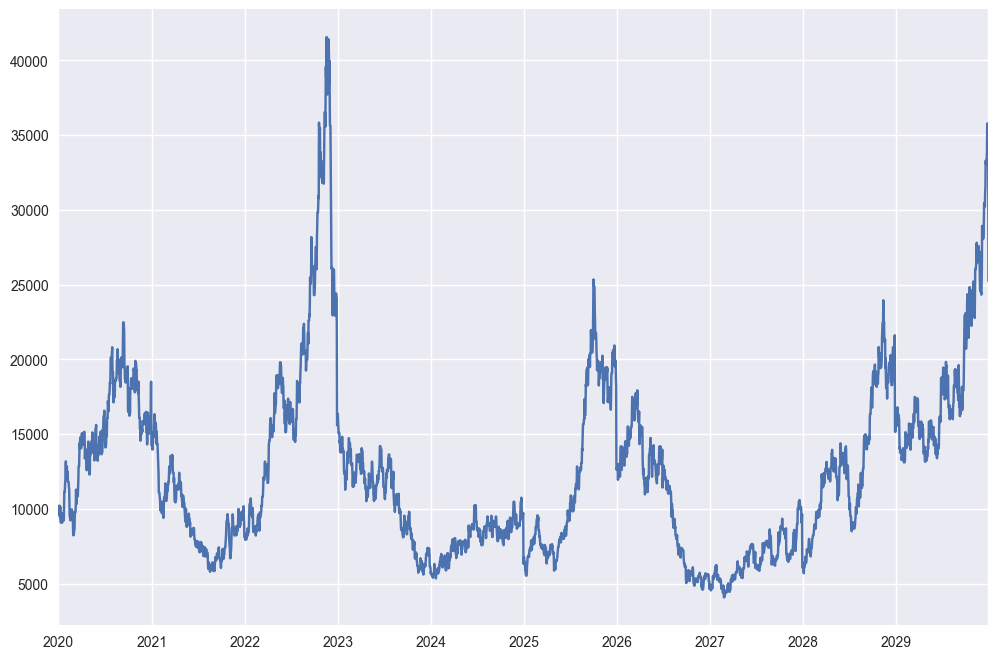

In [43]:
TI.data.Equity.plot(figsize = (12, 8)) # Equity (Trading Capital)
plt.show()

In [44]:
required_end_value = I0 * (1+infl)**10 # capital shall increase @ 3% p.a.
required_end_value

13439.163793441223

In [45]:
TI.data.Equity.iloc[-1] > required_end_value

True

## A path-dependent Simulation with Taxes and Income - many Simulations

In [46]:
start = "2020-01-01"
end = "2029-12-31"
I0 = 10000
distr = 545.7 # monthly distribution
infl = 0.03
tax = 0.25

In [47]:
ann_mean = 1.05
ann_std = 0.67 

In [48]:
TI = Trade_Income(start, end, I0, distr, infl, tax)
TI

In [49]:
results = TI.simulate_many(ann_mean, ann_std, seed = 123, sims = 1000)

In [50]:
results

[25230.0,
 512713884.0,
 500903.0,
 3405722.0,
 5648124044.0,
 2492242.0,
 287655179.0,
 554314.0,
 30795034.0,
 0.0,
 208371176.0,
 113592576.0,
 70427472.0,
 172666086.0,
 0.0,
 3246239.0,
 293559289.0,
 1144449.0,
 0.0,
 10864149.0,
 0.0,
 14114548.0,
 5740297.0,
 0.0,
 3464761.0,
 7358528.0,
 306959096.0,
 24168019.0,
 0.0,
 0.0,
 5107004561.0,
 8544533.0,
 0.0,
 27010095.0,
 215058046.0,
 0.0,
 184690.0,
 1086160.0,
 0.0,
 0.0,
 0.0,
 81955542.0,
 0.0,
 12905733.0,
 714393635.0,
 0.0,
 2643560.0,
 3410431.0,
 14866079.0,
 23141738.0,
 212150017.0,
 5322089294.0,
 0.0,
 1864189.0,
 85251970.0,
 0.0,
 22840737.0,
 917167665.0,
 441895051.0,
 123724299.0,
 1050198126.0,
 6530533.0,
 0.0,
 172850139.0,
 114213979.0,
 57358644.0,
 0.0,
 0.0,
 101997997.0,
 6342336.0,
 54684655.0,
 3680475706.0,
 366869517.0,
 1351314190.0,
 0.0,
 101947361.0,
 29347885.0,
 0.0,
 87460428.0,
 0.0,
 146453124.0,
 1733948344.0,
 30037734.0,
 0.0,
 0.0,
 237196002.0,
 14570221.0,
 56043895.0,
 36918027.0,


In [51]:
required_end_value

13439.163793441223

In [52]:
(np.array(results) < required_end_value).mean() # shortfall probabilty over the next 10 years

0.317

-> With an initial Income Distribution of USD 545.7, the shortfall probability over the next 10 years is 31.7% <br>
-> Level of Income is not sustainable.

## Shortfall Risk and a Sustainable Income Level

__Determine a sustainable income distribution level with a shortfall probability of approx. 5%.__

(Acceptable Shortfall Probability depends on the Individual´s Risk Tolerance)

A Trader has created a levered trading strategy that (on average) generates an __annualized mean return of 105%__ (log) with a __standard deviation of 67%__. <br>
The applicable (flat) __tax rate is 25%__ and the __inflation__ protection shall be __3% p.a.__<br>
Calculate the Trader´s __sustainable income__ if the trader starts with __USD 10,000__ (available funds for trading).

In [53]:
simple_sol = 1136
simple_sol

1136

__Rule of Thumb: Adjustment Factor between 20% and 50%__

In [54]:
adj_factor = 0.25 # 25%

In [55]:
distr = simple_sol * adj_factor
distr

284.0

In [56]:
TI = Trade_Income(start, end, I0, distr, infl, tax)
TI

In [57]:
results = TI.simulate_many(ann_mean, ann_std, seed = 123, sims = 1000)

In [ ]:
results

In [ ]:
required_end_value

In [ ]:
(np.array(results) < required_end_value).mean() # shortfall probabilty after 10 years

__-> 25% of simple Solution Income!__

## Final Remarks

__Final Remarks__

- (Trying to) simulate the Future is not an exact science
- It is based on various assumptions and uncertainties
- there are more complex/accurate models
- very effective additional feature: making dynamic (path-dependent) adjustments to income distributions

Key message: If Income Distributions are too high, Risk of running out of trading capital is high as well.
Approx. __20% to 50%__ of simple solution Income!

__Excursus: Advanced Performance Attribution__

Simple Solution Income: __USD 1136__ <br>
Actual (sustainable) Income: __USD 284__

-> The Difference is attributable to __Timing__ and __Risk__. What´s the sustainable Income if we assume __zero Risk__?

In [ ]:
start = "2020-01-01"
end = "2029-12-31"
I0 = 10000
distr = 739.08 # sustainable monthly income assuming zero risk
infl = 0.03
tax = 0.25

In [ ]:
ann_mean = 1.05
ann_std = 0 # zero risk

In [ ]:
TI = Trade_Income(start, end, I0, distr, infl, tax)
TI

In [ ]:
TI.simulate_one(ann_mean, ann_std, seed = 123)

In [ ]:
TI.data

In [ ]:
TI.data.Dist.plot(figsize = (12, 8))
plt.show()

In [ ]:
TI.data.Tax.plot(figsize = (12, 8))
plt.show()

In [ ]:
TI.data.Equity.plot(figsize = (12, 8))
plt.show()

- 284 -> 739 attributable to Risk
- 739 -> 1136 attributable to Timing